<a href="https://colab.research.google.com/github/RishithaKunchala/ADM/blob/main/Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = {
 'TV': [230,44.5,17.2],
 'Radio': [37.8,39.3,45.9],
 'Newspaper': [69.2,45.1,69.3],
 'Sales': [22.1,10.4,9.3]
}
# Convert to DataFrame
df=pd.DataFrame(data)
# Define independent (X) and dependent (y) variables
X=df[['TV', 'Radio','Newspaper']]
y=df['Sales']
# Split dataset into training and testing sets (80% train, 20% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Initialize and train the regression model
model=LinearRegression()
model.fit(X_train,y_train)
# Make predictions
y_pred=model.predict(X_test)
# Print model coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
# Evaluate the model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Coefficients: [ 0.0218481  -0.00528196 -0.01936718]
Intercept: 10.50880035504078
Mean Squared Error: 65.70728388738515
R-squared Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


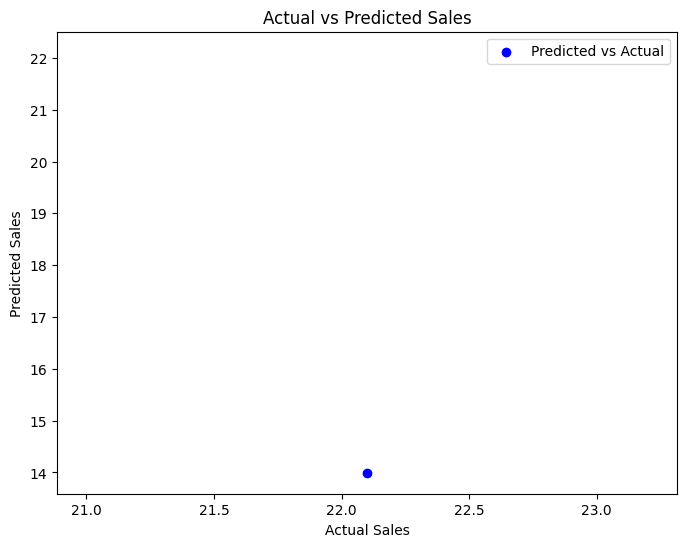

In [ ]:
# 1. Plot Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

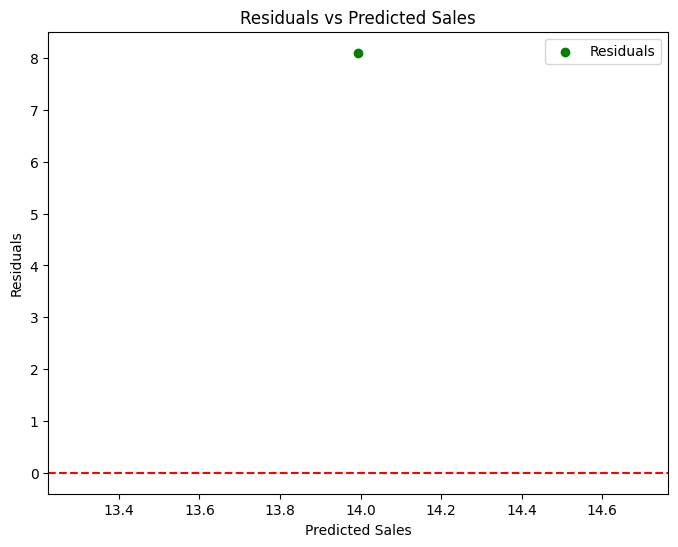

In [ ]:
# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Line for no residuals
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.legend()
plt.show()

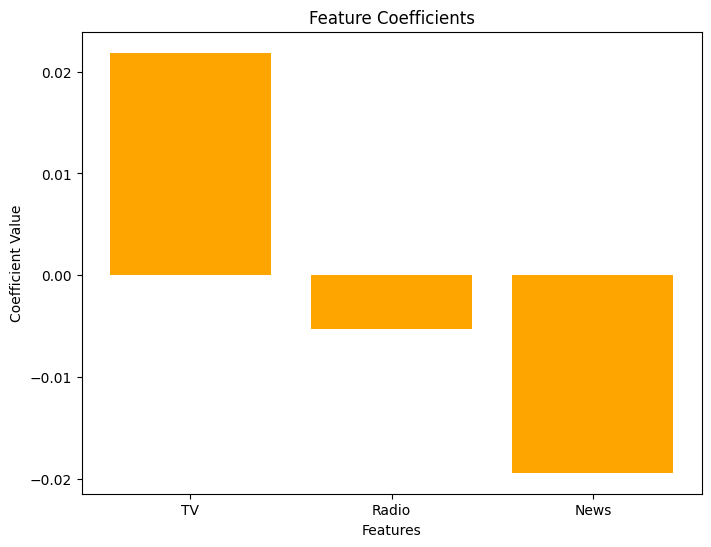

In [ ]:
# 3. Coefficients Plot
features = ['TV', 'Radio', 'News']
plt.figure(figsize=(8, 6))
plt.bar(features, model.coef_, color='orange')
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients")
plt.show()

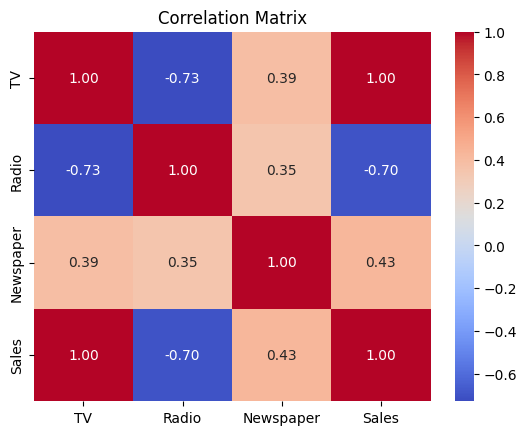

In [ ]:
# 4. Correlation Matrix Plot
import seaborn as sns
corr_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

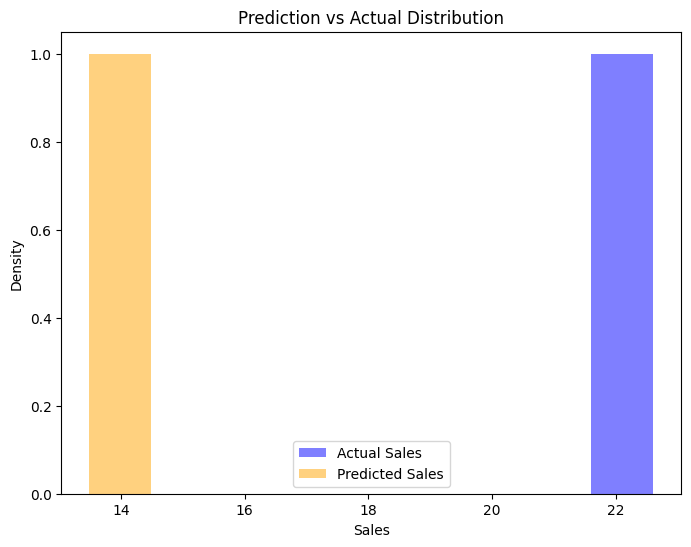

In [ ]:
# 5. Prediction Distribution (Predicted vs Actual Distribution)
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color='blue', label='Actual Sales', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred, color='orange', label='Predicted Sales', kde=True, stat="density", linewidth=0)
plt.legend()
plt.title("Prediction vs Actual Distribution")
plt.xlabel("Sales")
plt.ylabel("Density")
plt.show()